Challenge Info
URL: https://github.com/MicrosoftDocs/ml-basics/blob/master/challenges/01%20-%20Flights%20Challenge.ipynb


Flights Data Exploration Challenge
In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

    - Year: The year of the flight (all records are from 2013)
    - Month: The month of the flight
    - DayofMonth: The day of the month on which the flight departed
    - DayOfWeek: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
    - Carrier: The two-letter abbreviation for the airline.
    - OriginAirportID: A unique numeric identifier for the departure aiport
    - OriginAirportName: The full name of the departure airport
    - OriginCity: The departure airport city
    - OriginState: The departure airport state
    - DestAirportID: A unique numeric identifier for the destination aiport
    - DestAirportName: The full name of the destination airport
    - DestCity: The destination airport city
    - DestState: The destination airport state
    - CRSDepTime: The scheduled departure time
    - DepDelay: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
    - DelDelay15: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
    - CRSArrTime: The scheduled arrival time
    - ArrDelay: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
    - ArrDelay15: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
    - Cancelled: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

    1. Start by cleaning the data.
        - Identify any null or missing data, and impute appropriate replacement values.
        - Identify and eliminate any outliers in the DepDelay and ArrDelay columns.
    
    2. Explore the cleaned data.
        - View summary statistics for the numeric fields in the dataset.
        - Determine the distribution of the DepDelay and ArrDelay columns.
        - Use statistics, aggregate functions, and visualizations to answer the following questions:
            - How do the carriers compare in terms of arrival delay performance?
            - Is there a noticable difference in arrival delays for different days of the week?
            - Which departure airport has the highest average departure delay?
            - Do late* departures tend to result in longer arrival delays than on-time departures?*
            - Which route (from origin airport to destination airport) has the most late* arrivals?*
            - Which route has the highest average arrival delay?

In this section of the notebook I will define all of the functions that I will call later on

In [1]:
def central_measuremnt(raw_data):
    mean = raw_data.mean()
    mode = raw_data.mode()[0]
    median = raw_data.median()

    print('\n','='*30,'\n')
    print(f"""
        mean: {mean:.2f}
        mode: {mode:.2f}
        median: {median:.2f}
        """)
    print('\n','='*30,'\n')

    return mean, mode, median

def data_plot(raw_data, tlt):
    """ The purpose of this function is to print a box plot grap
    sumarizing the data info, and find outliers in the data set
    """
    central_measuremnt(raw_data)
    
    #First I will need to import the library
    from matplotlib import pyplot as plt
    %matplotlib inline
    
    #Create the figure
    fig = plt.figure(figsize=(10,4))

    #Plot the box
    plt.boxplot(raw_data, vert=False)
    plt.title(f'Box Distribution: {tlt}')

    plt.show()


In [2]:
#import modules
import numpy as np
import pandas as pd

#Load the data
df_flights = pd.read_csv('flights.csv',delimiter=',',header='infer')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478.0,John F. Kennedy International,New York,NY,1539.0,4.0,0.0,1824.0,13.0,0.0,0.0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232.0,Chicago Midway International,Chicago,IL,710.0,3.0,0.0,740.0,22.0,1.0,0.0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278.0,Ronald Reagan Washington National,Washington,DC,810.0,-3.0,0.0,1614.0,-7.0,0.0,0.0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042.0,Cleveland-Hopkins International,Cleveland,OH,804.0,35.0,1.0,1027.0,33.0,1.0,0.0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397.0,Hartsfield-Jackson Atlanta International,Atlanta,GA,545.0,-1.0,0.0,728.0,-9.0,0.0,0.0


1. Start by cleaning the data.
        - Identify any null or missing data, and impute appropriate replacement values.

In [3]:
print(df_flights.isnull().sum())

Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
Carrier                0
OriginAirportID        0
OriginAirportName      0
OriginCity             1
OriginState            1
DestAirportID          1
DestAirportName        1
DestCity               1
DestState              1
CRSDepTime             1
DepDelay               1
DepDel15             448
CRSArrTime             1
ArrDelay               1
ArrDel15               1
Cancelled              1
dtype: int64


In [4]:
df_flights[df_flights['DepDel15'].isnull()].head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930.0,Chicago O'Hare International,Chicago,IL,835.0,0.0,NaN,945.0,0.0,1.0,1.0
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930.0,Chicago O'Hare International,Chicago,IL,1719.0,0.0,NaN,1738.0,0.0,1.0,1.0
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930.0,Chicago O'Hare International,Chicago,IL,1935.0,0.0,NaN,2125.0,0.0,1.0,1.0
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397.0,Hartsfield-Jackson Atlanta International,Atlanta,GA,630.0,0.0,NaN,809.0,0.0,1.0,1.0
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193.0,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320.0,0.0,NaN,1524.0,0.0,1.0,1.0


In [5]:
#It looks like that when a flight depart on time the DepDelay is 0.0, therefore the DepDel15 is N/A
#What I will do is to replace those NaN for 0.0

df_flights['DepDel15'] = df_flights['DepDel15'].fillna(0.0)

In [6]:
print(df_flights.isnull().sum())

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           1
OriginState          1
DestAirportID        1
DestAirportName      1
DestCity             1
DestState            1
CRSDepTime           1
DepDelay             1
DepDel15             0
CRSArrTime           1
ArrDelay             1
ArrDel15             1
Cancelled            1
dtype: int64


In [7]:
df_flights[df_flights['DestCity'].isnull()]


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
44740,2013,10,4,5,UA,13204,Orland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [8]:
#Now I found that most of the null values are stored in the row 44740, 
#since there is a single row I will drop this row from the data set

df_flights = df_flights.drop(index=44740,axis= 1)

AT this point the Null Vaules in the data were handled. Now I will need to start with the explatori analysis

- Identify and eliminate any outliers in the DepDelay and ArrDelay columns.




        mean: 6.68
        mode: 0.00
        median: -3.00
        




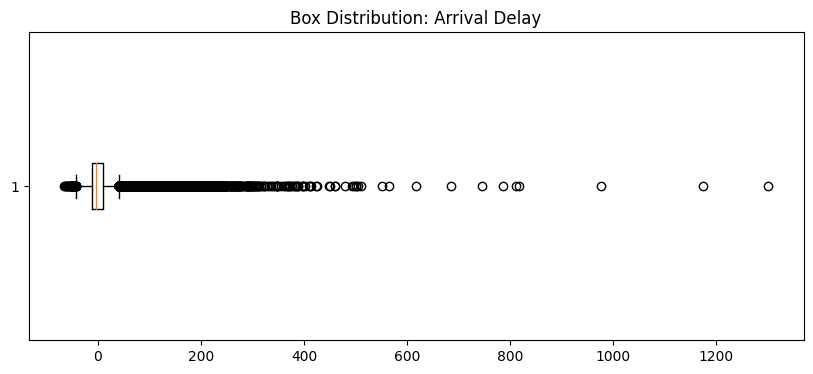




        mean: 10.53
        mode: -3.00
        median: -1.00
        




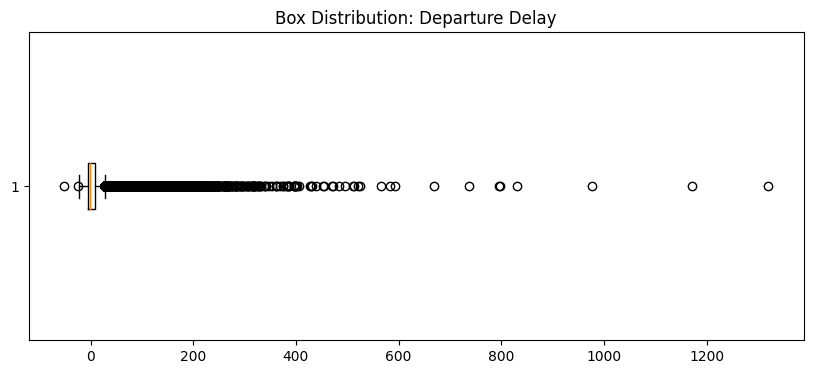

In [9]:
#plot the box for both columns
flg_ArrDelay = df_flights['ArrDelay']
flg_DepDelay = df_flights['DepDelay']

data_plot(flg_ArrDelay,'Arrival Delay')
data_plot(flg_DepDelay,'Departure Delay')


The box plot for both columns has lot of noise in the right side of the plots
here I can try to filter the data by percintiles or filter is gettin values under 15 mins

In [10]:
"""
These values to filter the outliers in the data will work, but are meaningless 
since I was iterating to get them, so, it will be better if I use percentiles to exclude the outliers


df_flights_otl = df_flights.copy()

df_flights_otl = df_flights_otl[df_flights_otl['ArrDelay'] >= -30]
df_flights_otl = df_flights_otl[df_flights_otl['ArrDelay'] <= 28]
df_flights_otl = df_flights_otl[df_flights_otl['DepDelay'] >= -15]
df_flights_otl = df_flights_otl[df_flights_otl['DepDelay'] <= 10]

print(df_flights['ArrDelay'].count(),df_flights_otl['ArrDelay'].count(), df_flights_otl['DepDelay'].count() , df_flights['ArrDelay'].count() - df_flights_otl['ArrDelay'].count())
data_plot(df_flights_otl['ArrDelay'])
data_plot(df_flights_otl['DepDelay'])
"""


"\nThese values to filter the outliers in the data will work, but are meaningless \nsince I was iterating to get them, so, it will be better if I use percentiles to exclude the outliers\n\n\ndf_flights_otl = df_flights.copy()\n\ndf_flights_otl = df_flights_otl[df_flights_otl['ArrDelay'] >= -30]\ndf_flights_otl = df_flights_otl[df_flights_otl['ArrDelay'] <= 28]\ndf_flights_otl = df_flights_otl[df_flights_otl['DepDelay'] >= -15]\ndf_flights_otl = df_flights_otl[df_flights_otl['DepDelay'] <= 10]\n\nprint(df_flights['ArrDelay'].count(),df_flights_otl['ArrDelay'].count(), df_flights_otl['DepDelay'].count() , df_flights['ArrDelay'].count() - df_flights_otl['ArrDelay'].count())\ndata_plot(df_flights_otl['ArrDelay'])\ndata_plot(df_flights_otl['DepDelay'])\n"

In [11]:
# Use the percentil to filter out ourliers
q90_ArrDelay = df_flights['ArrDelay'].quantile(0.8)
q90_DepDelay = df_flights['DepDelay'].quantile(0.72)

print(round(q90_ArrDelay,0),round(q90_DepDelay,0))

15.0 7.0


In [12]:
q10_ArrDelay = df_flights['ArrDelay'].quantile(0.02)
q10_DepDelay = df_flights['DepDelay'].quantile(0.02)

print(round(q10_ArrDelay,0),round(q10_DepDelay,0))

-29.0 -10.0


       Month    OriginCity       DestCity  ArrDelay  DepDelay
11022      8      New York     Long Beach     -66.0      -7.0
13032      4      New York    Los Angeles     -63.0      -7.0
3751       8      New York        Phoenix     -62.0      -5.0
39943      5      New York      San Diego     -61.0      -9.0
16430      7      New York    Los Angeles     -60.0       0.0
20141      6      New York    Los Angeles     -57.0      -3.0
42745      9  Philadelphia  San Francisco     -56.0      -7.0
44700      5        Newark  San Francisco     -56.0      -1.0
16099      5      New York    Minneapolis     -54.0      -3.0
9286       5        Newark    Los Angeles     -53.0      -2.0
       Month         OriginCity           DestCity  ArrDelay  DepDelay
5359      10             Boston             Newark     -29.0     -10.0
10718      5            Detroit  Dallas/Fort Worth     -29.0     -10.0
12268      9  Dallas/Fort Worth        Los Angeles     -29.0     -10.0
25753      6              Omaha   

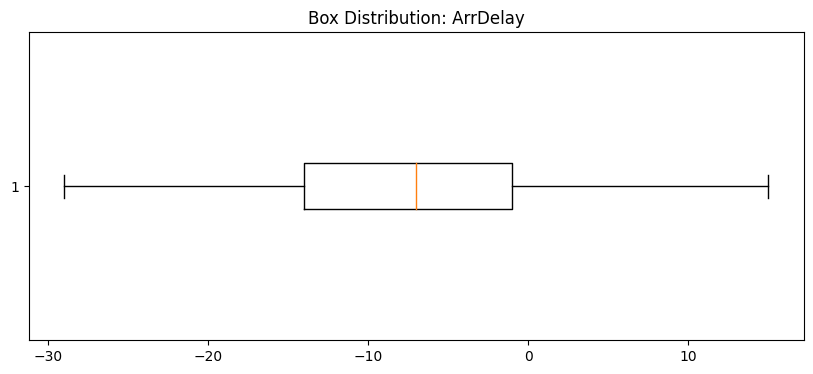




        mean: -2.36
        mode: -3.00
        median: -3.00
        




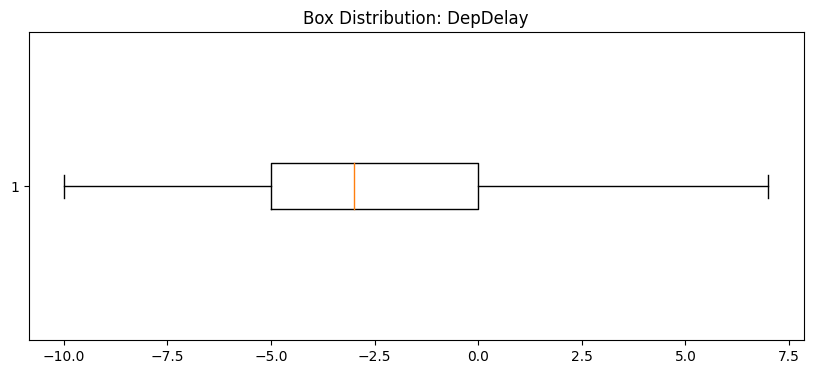

In [13]:
df_flights_otl = df_flights.copy()

df_flights_otl = df_flights_otl.sort_values(['ArrDelay','DepDelay'], ascending=True)

print(df_flights_otl[['Month','OriginCity','DestCity','ArrDelay','DepDelay']].head(10))

df_flights_otl = df_flights_otl[df_flights_otl['ArrDelay'] >= q10_ArrDelay]
df_flights_otl = df_flights_otl[df_flights_otl['ArrDelay'] <= q90_ArrDelay]
df_flights_otl = df_flights_otl[df_flights_otl['DepDelay'] >= q10_DepDelay]
df_flights_otl = df_flights_otl[df_flights_otl['DepDelay'] <= q90_DepDelay]


print(df_flights_otl[['Month','OriginCity','DestCity','ArrDelay','DepDelay']].head(10))


data_plot(df_flights_otl['ArrDelay'], 'ArrDelay')
data_plot(df_flights_otl['DepDelay'], 'DepDelay')

To remove outliers I will filter the data set by percentiles for twon columns, first I will retrive data between p2% and p80% for the column 'ArrDelay' and the data where the 'DepDelay' is between p2% and p72%.

The Data set in the "df_flights_otl" will be those rows of data where the Arrival Delay was higher than -29 or less than 15, and where the Departure Delay was higher than -10 and less than 7. 

Now I have clean data, let's continue with the 2 part of the challenge: Explore the data.

    - View summary statistics for the numeric fields in the dataset

In [14]:
df_flights_otl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29798 entries, 5359 to 33526
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               29798 non-null  int64  
 1   Month              29798 non-null  int64  
 2   DayofMonth         29798 non-null  int64  
 3   DayOfWeek          29798 non-null  int64  
 4   Carrier            29798 non-null  object 
 5   OriginAirportID    29798 non-null  int64  
 6   OriginAirportName  29798 non-null  object 
 7   OriginCity         29798 non-null  object 
 8   OriginState        29798 non-null  object 
 9   DestAirportID      29798 non-null  float64
 10  DestAirportName    29798 non-null  object 
 11  DestCity           29798 non-null  object 
 12  DestState          29798 non-null  object 
 13  CRSDepTime         29798 non-null  float64
 14  DepDelay           29798 non-null  float64
 15  DepDel15           29798 non-null  float64
 16  CRSArrTime         

In [15]:
df_flights_otl.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,29798.0,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.0,29798.000000,29798.000000,29798.000000,29798.000000
mean,2013.0,7.041412,15.742734,3.891872,12763.657326,12717.708739,1257.972851,-2.360561,0.0,1440.262501,-7.138701,0.020740,0.015572
std,0.0,2.019645,8.898309,1.997428,1514.852667,1507.116182,470.316044,3.786426,0.0,483.818415,9.171509,0.142514,0.123813
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,17.000000,-10.000000,0.0,1.000000,-29.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,837.000000,-5.000000,0.0,1040.000000,-14.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1210.000000,-3.000000,0.0,1423.000000,-7.000000,0.000000,0.000000
75%,2013.0,9.000000,24.000000,6.000000,14100.000000,14057.000000,1636.000000,0.000000,0.0,1831.000000,-1.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,7.000000,0.0,2359.000000,15.000000,1.000000,1.000000


From the describe() method results I can give us an idea that about the Arraival Delay and the Departure Arraival 

Arraival Delay: 
    - 75% of the flights arrived 1 min or more earlier earlier 

Deprarture Delay: 
    - half of the flights had a early departure, 
    - 75% of the fligts departured on time or earlier. 

    - Determine the distribution of the DepDelay and ArrDelay columns.

In [16]:
def distrubution_chart(clean_data,tlt):
    from matplotlib import pyplot as plt
    %matplotlib inline

    # Calculate central tendecy measurements
    mean , mode, median = central_measuremnt(clean_data)

    
    graps = [1,2]

    for opt in graps:

        #Create a figure
        fig = plt.figure(figsize=(10,4))

        if opt == 1:
            plt.hist(clean_data)
            plt.title(f'{tlt} Histogram')
        elif opt == 2:
            clean_data.plot.density()
            plt.title(f'{tlt} Distribution Bell')
        

        #plot the distribution
        plt.xlabel('Delay Time')
        plt.ylabel('Frequency')


        plt.axvline(x = mean , color= 'cyan' ,linewidth= 2 , linestyle= ':')
        plt.axvline(x = mode , color= 'red' ,linewidth= 2 , linestyle= ':')
        plt.axvline(x = median , color= 'yellow' ,linewidth= 2 , linestyle= ':')
        
        plt.show()






        mean: -7.14
        mode: 0.00
        median: -7.00
        




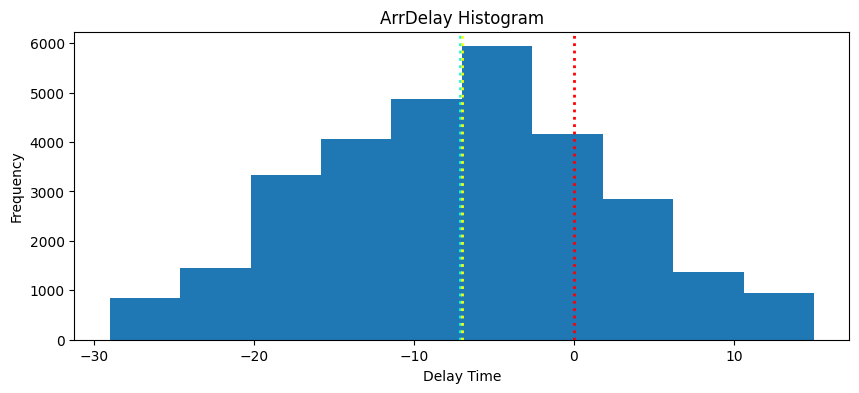

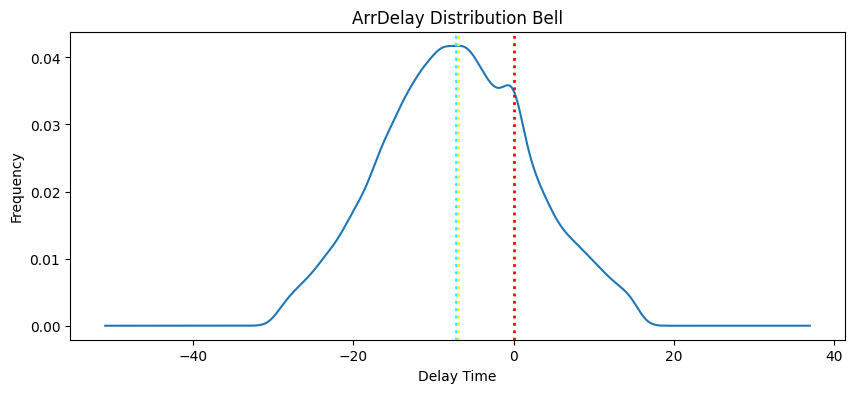

In [17]:
distrubution_chart(df_flights_otl['ArrDelay'],'ArrDelay')




        mean: -2.36
        mode: -3.00
        median: -3.00
        




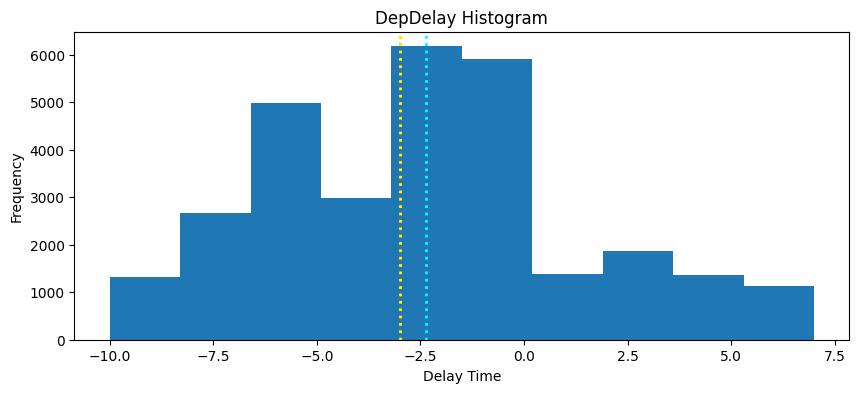

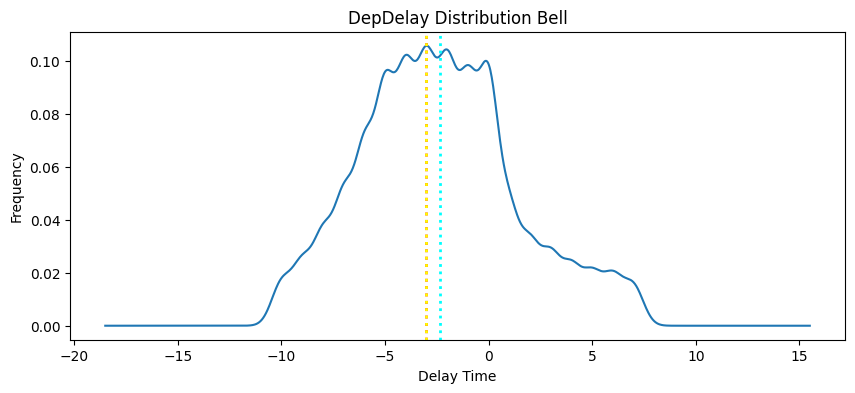

In [18]:
distrubution_chart(df_flights_otl['DepDelay'],'DepDelay')


    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - What are the average (mean) departure and arrival delays?

In [19]:
ArrDelayAvg = df_flights_otl['ArrDelay'].mean()
DepDelayAvg = df_flights_otl['DepDelay'].mean()

print(f"The average Arraival Delay is: {ArrDelayAvg:.2f} and the average Departure Delay: {DepDelayAvg:.2f}")

The average Arraival Delay is: -7.14 and the average Departure Delay: -2.36


        - How do the carriers compare in terms of arrival delay performance?

In [20]:
AvgArrDelayCarrier = df_flights_otl.groupby(df_flights_otl['Carrier'])['ArrDelay'].mean()
print(AvgArrDelayCarrier.sort_values(ascending=False))

Carrier
HA   -2.613636
F9   -3.395225
AS   -4.964072
YV   -5.037866
WN   -5.461246
OO   -6.061480
FL   -6.413828
US   -6.430595
MQ   -6.673010
VX   -7.288136
B6   -7.780066
AA   -7.832374
DL   -8.306418
EV   -8.715998
9E   -8.803700
UA   -9.737760
Name: ArrDelay, dtype: float64


<Axes: title={'center': 'ArrDelay'}, xlabel='Carrier'>

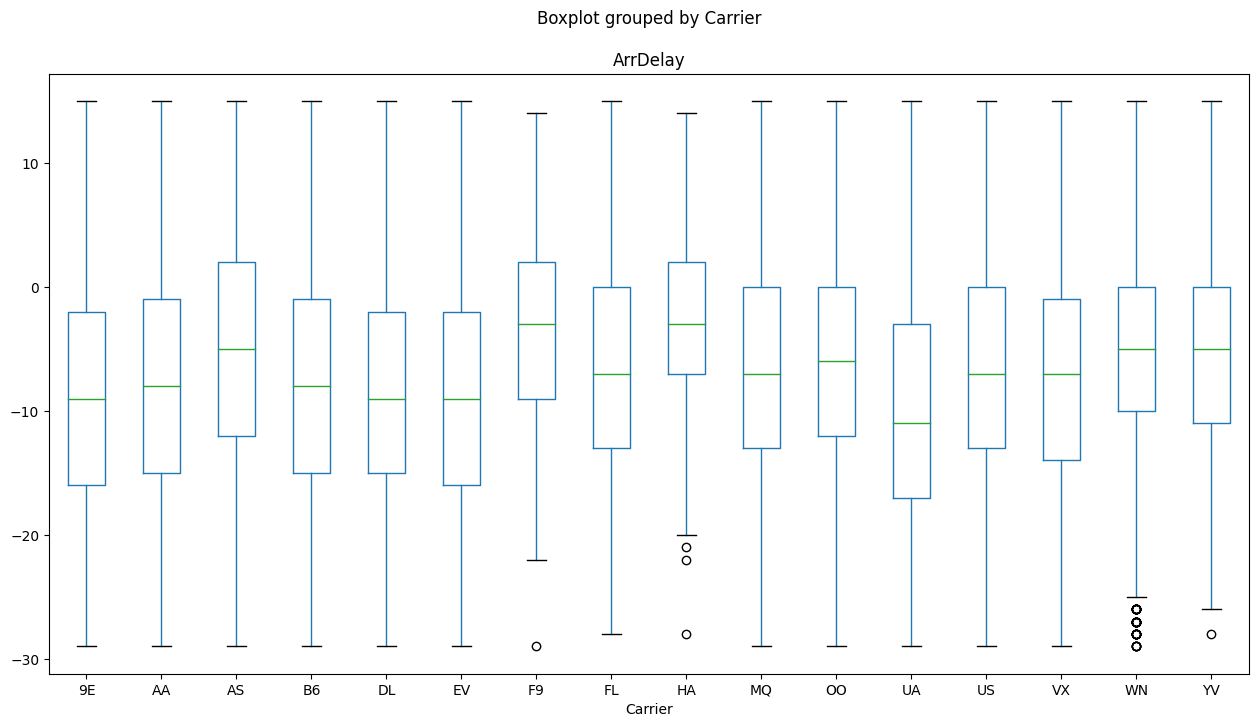

In [21]:
df_flights_otl.boxplot(column='ArrDelay',by='Carrier',figsize=(15,8),grid=False)

From the comparation I found that all of the Carries use to Arraive earlier, the carrier HA is the one is closer to the Arrival Schedule our, arriving 2.61 minutes before in average, on the other hand the carrier UA arrive 9.73 minutes earlier in average. 

        - Is there a noticable difference in arrival delays for different days of the week?

In [22]:
df_flights_otl[['DayOfWeek','ArrDelay']]

,DayOfWeek,ArrDelay
5359,2,-29.0
10718,7,-29.0
12268,2,-29.0
25753,3,-29.0
29196,7,-29.0
...,...,...
31073,3,15.0
1602,4,15.0
18590,5,15.0
24605,1,15.0


In [23]:
avgArrDeleyWeekDay = df_flights_otl.groupby(df_flights_otl['DayOfWeek'])['ArrDelay'].mean()
avgArrDeleyWeekDay.sort_values(ascending=False)

DayOfWeek
4   -6.407889
5   -6.805210
3   -6.983326
1   -7.019982
2   -7.331811
7   -7.547490
6   -7.976954
Name: ArrDelay, dtype: float64

In average all of the day of the week we have an early arrival, that is why the values are negative.

<Axes: xlabel='DayOfWeek'>

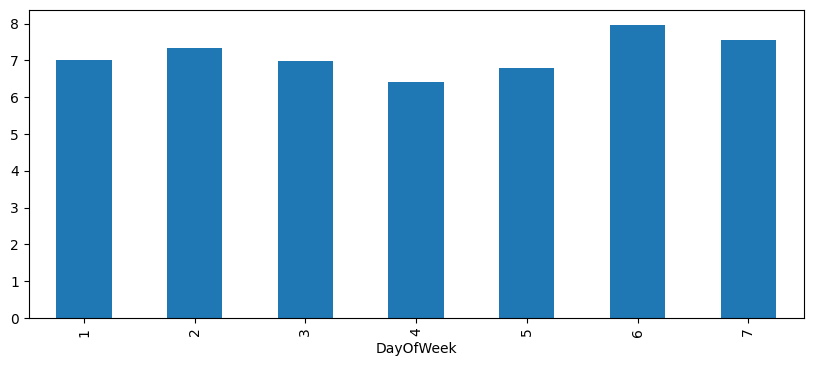

In [24]:
#PLot neggactive values is invonveniente since there is no contrast with not positive values
#For that reason I will transfor the Avg to an ABS value, in order to plot the info and try to make it more easy to understand

avgArrDeleyWeekDay = avgArrDeleyWeekDay.abs() #Tranform the values to positive
avgArrDeleyWeekDay.plot.bar(y = 'ArrDelay', x ='DayOfWeek',grid = False,figsize=(10,4))

In [25]:
round(avgArrDeleyWeekDay.loc[6] - avgArrDeleyWeekDay.loc[4],2)

1.57

There is no significant differency in the Arraival delay  per day, the day when the flights arrive closer to the achedule are Trusday with an early arrival of 6.41 mins average and the day where the arrival time and the schedule have a higher difference is on saturaday when the flights arrive 7.98 minuter earlier in average. Even Though, the difference between Thursday and Saturday is only 1.57 minutes or 94 seconds, which is not a significant difference. 

        - Which departure airport has the highest average departure delay?

In [26]:
avgAPDelay = df_flights_otl.groupby(df_flights_otl['OriginAirportName'])['DepDelay'].mean()
avgAPDelay.sort_values()

OriginAirportName
Long Beach Airport                    -4.279570
Richmond International                -4.200000
Eppley Airfield                       -3.950311
Tucson International                  -3.944828
Ted Stevens Anchorage International   -3.764045
                                         ...   
Dallas/Fort Worth International       -1.155844
Metropolitan Oakland International    -0.883459
Chicago Midway International          -0.546083
William P Hobby                       -0.175627
Dallas Love Field                      0.266355
Name: DepDelay, Length: 70, dtype: float64

"Long Beach Airport" is where the departure delay will be higher, at this airpot flights depart 4.28 minutes earlier. 

        - Do late* departures tend to result in longer arrival delays than on-time departures?*

In [27]:
#First lets check the correlation between the variables and then plot a scatter graph to check if we can se a trend 

ldp_arrdel_corr = round(df_flights_otl['ArrDelay'].corr(df_flights_otl['DepDelay']),4)
print(ldp_arrdel_corr)

0.3237


<Axes: title={'center': 'Departure Delay correlation'}, xlabel='DepDelay', ylabel='ArrDelay'>

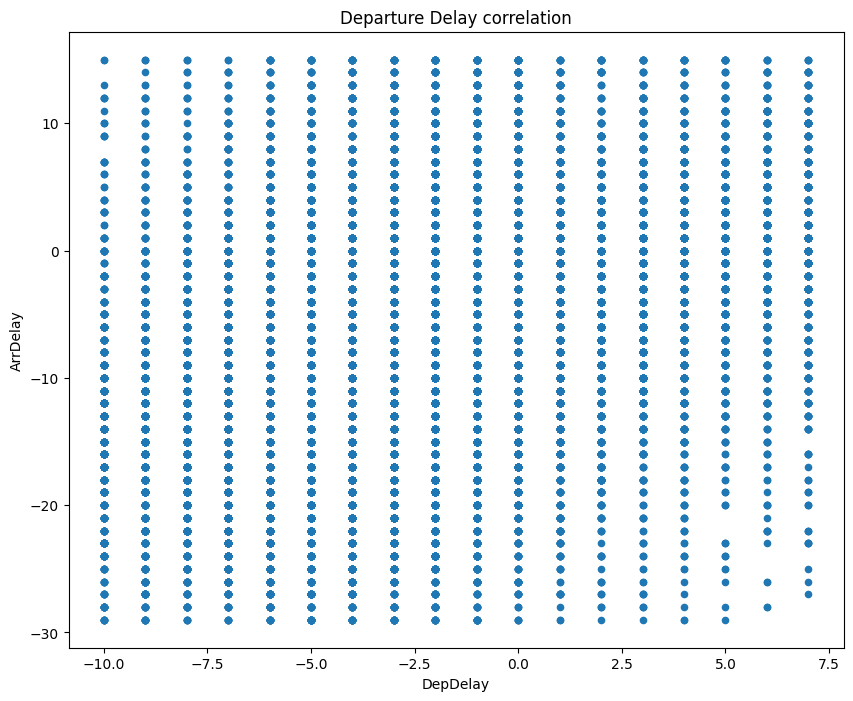

In [28]:
df_flights_otl.plot.scatter(title='Departure Delay correlation', x = 'DepDelay',y = 'ArrDelay',figsize=(10,8))

There is no evidence of a relation between the Departure delay and the arrival delay, the correlation between those variables is 0.32 and in the scatter plot we can not see a trend all the points looks to be distributed around the graph. 

<Axes: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

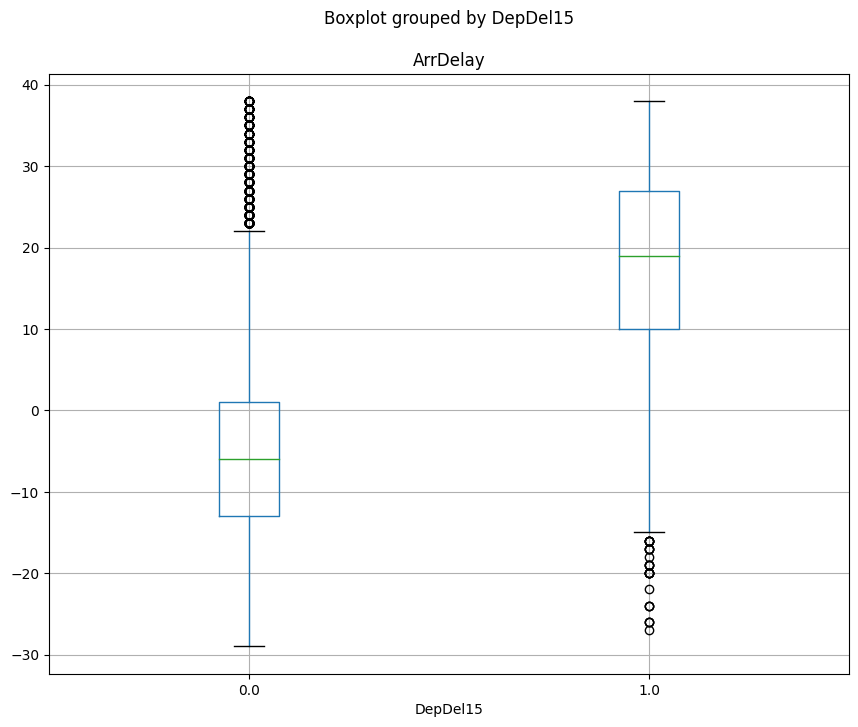

In [41]:
q90 = df_flights['ArrDelay'].quantile(0.9)
q2 = df_flights['ArrDelay'].quantile(0.02)

arrDel_q2_q90 = df_flights[df_flights['ArrDelay'] <= q90]
arrDel_q2_q90 = arrDel_q2_q90[arrDel_q2_q90['ArrDelay'] >= q2]

arrDel_q2_q90.boxplot(column='ArrDelay',by='DepDel15',figsize=(10,8))

        - Which route (from origin airport to destination airport) has the most late* arrivals?*

In [30]:
# lets conbine the columns Origin to destine
routesByName = pd.Series(df_flights['OriginAirportName'] + ' to '+ df_flights['DestAirportName'])


df_flights_routes = pd.concat([df_flights,routesByName.rename('routesByName')],axis=1)
df_flights_routes[['routesByName','ArrDel15']]

,routesByName,ArrDel15
0,Tampa International to John F. Kennedy Interna...,0.0
1,Pittsburgh International to Chicago Midway Int...,1.0
2,Seattle/Tacoma International to Ronald Reagan ...,0.0
3,Chicago O'Hare International to Cleveland-Hopk...,1.0
4,Norfolk International to Hartsfield-Jackson At...,0.0
...,...,...
44735,Phoenix Sky Harbor International to Ontario In...,0.0
44736,Fort Lauderdale-Hollywood International to Wil...,1.0
44737,Minneapolis-St Paul International to Dallas/Fo...,0.0
44738,Sacramento International to McCarran Internati...,1.0


In [31]:
routesDel15= df_flights_routes.groupby(df_flights_routes['routesByName'])['ArrDel15'].sum()
routesDel15.sort_values(ascending=False)

routesByName
Los Angeles International to San Francisco International                    51.0
San Francisco International to Los Angeles International                    42.0
McCarran International to San Francisco International                       33.0
Hartsfield-Jackson Atlanta International to LaGuardia                       33.0
LaGuardia to Hartsfield-Jackson Atlanta International                       31.0
                                                                            ... 
Salt Lake City International to Orlando International                        0.0
Salt Lake City International to Norman Y. Mineta San Jose International      0.0
Denver International to Southwest Florida International                      0.0
Salt Lake City International to Nashville International                      0.0
Louis Armstrong New Orleans International to San Francisco International     0.0
Name: ArrDel15, Length: 2417, dtype: float64

Solution taken from the repo: https://github.com/MicrosoftDocs/ml-basics/blob/master/challenges/01%20-%20Flights%20Solution.ipynb


        - Which route has the highest average arrival delay?

In [49]:
avgArrDel = df_flights_routes.groupby(df_flights_routes['routesByName'])['ArrDelay'].mean()
avgArrDel.sort_values(ascending=False)

routesByName
Dallas/Fort Worth International to Kahului Airport                        274.000000
Fort Lauderdale-Hollywood International to Port Columbus International    217.000000
Kahului Airport to San Diego International                                163.333333
Will Rogers World to San Francisco International                          139.000000
McCarran International to Ronald Reagan Washington National               125.666667
                                                                             ...    
John F. Kennedy International to Honolulu International                   -32.500000
Louis Armstrong New Orleans International to Logan International          -33.000000
LaGuardia to Jacksonville International                                   -33.500000
John F. Kennedy International to Long Beach Airport                       -33.800000
Cleveland-Hopkins International to Portland International                 -40.000000
Name: ArrDelay, Length: 2417, dtype: float64